In [10]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
path = '20250108_NH3/'
file = os.listdir(path)

dfs = []
for f in file[5:81]:
    dfs.append(pd.read_csv(path+f, index_col='Time'))    
df = pd.concat(dfs, ignore_index=True)
print(df.shape)
df.head()

(7626, 2048)


,49.750000,50.250000,50.750000,51.250000,51.760000,52.260000,52.760000,53.260000,53.760000,54.260000,...,1186.380000,1186.990000,1187.590000,1188.200000,1188.810000,1189.410000,1190.020000,1190.630000,1191.240000,1191.840000
0,-40.0,-33.0,3.0,-7.0,12.0,38.0,-5.0,13.0,4.0,-29.0,...,-23.0,-5.0,-24.0,3.0,-6.0,41.0,-14.0,-35.0,-21.0,-15.0
1,-31.0,-25.0,15.0,5.0,11.0,29.0,-12.0,13.0,-2.0,-26.0,...,-18.0,-2.0,-18.0,11.0,-2.0,55.0,-4.0,-31.0,-20.0,-2.0
2,-36.0,-25.0,7.0,10.0,12.0,37.0,-7.0,5.0,-3.0,-21.0,...,-18.0,12.0,-29.0,9.0,5.0,45.0,0.0,-44.0,-23.0,-3.0
3,-36.0,-23.0,21.0,8.0,16.0,43.0,-8.0,-2.0,-4.0,-34.0,...,-16.0,5.0,-27.0,-1.0,1.0,63.0,-5.0,-32.0,-21.0,0.0
4,-33.0,-17.0,4.0,0.0,18.0,35.0,6.0,5.0,9.0,-18.0,...,-14.0,12.0,-15.0,-3.0,-18.0,61.0,-11.0,-18.0,-25.0,-5.0


In [12]:
def DropFromSecond(x):
    x = x * 10
    x = np.floor(x)
    return x/10

# Given the spectrometer measures 200 - 1100 nn, drop columns outside this range
# df = df[df.columns[296:]]
new_col = [str(DropFromSecond(x)) for x in df.columns.astype(float)]
df.columns = new_col
df.index = [0.5*i for i in range(len(df.index))]
df.head()

,49.7,50.2,50.7,51.2,51.7,52.2,52.7,53.2,53.7,54.2,...,1186.3,1186.9,1187.5,1188.2,1188.8,1189.4,1190.0,1190.6,1191.2,1191.8
0.0,-40.0,-33.0,3.0,-7.0,12.0,38.0,-5.0,13.0,4.0,-29.0,...,-23.0,-5.0,-24.0,3.0,-6.0,41.0,-14.0,-35.0,-21.0,-15.0
0.5,-31.0,-25.0,15.0,5.0,11.0,29.0,-12.0,13.0,-2.0,-26.0,...,-18.0,-2.0,-18.0,11.0,-2.0,55.0,-4.0,-31.0,-20.0,-2.0
1.0,-36.0,-25.0,7.0,10.0,12.0,37.0,-7.0,5.0,-3.0,-21.0,...,-18.0,12.0,-29.0,9.0,5.0,45.0,0.0,-44.0,-23.0,-3.0
1.5,-36.0,-23.0,21.0,8.0,16.0,43.0,-8.0,-2.0,-4.0,-34.0,...,-16.0,5.0,-27.0,-1.0,1.0,63.0,-5.0,-32.0,-21.0,0.0
2.0,-33.0,-17.0,4.0,0.0,18.0,35.0,6.0,5.0,9.0,-18.0,...,-14.0,12.0,-15.0,-3.0,-18.0,61.0,-11.0,-18.0,-25.0,-5.0


In [13]:
df = df.iloc[:, np.arange(295,1813,1)] # wavelength range for the spectrometer
df.head()

,200.2,200.7,201.2,201.8,202.3,202.8,203.3,203.8,204.3,204.9,...,1044.9,1045.5,1046.1,1046.7,1047.3,1047.9,1048.5,1049.0,1049.6,1050.2
0.0,-11.0,3.0,1.0,-18.0,-34.0,-13.0,21.0,-4.0,-7.0,-14.0,...,43.0,6.0,57.0,56.0,35.0,45.0,5.0,49.0,31.0,12.0
0.5,-8.0,10.0,5.0,8.0,-23.0,-7.0,1.0,8.0,-12.0,-19.0,...,39.0,3.0,57.0,36.0,34.0,26.0,14.0,48.0,26.0,25.0
1.0,-17.0,2.0,14.0,-5.0,-24.0,-23.0,5.0,2.0,-2.0,-5.0,...,29.0,21.0,48.0,65.0,22.0,43.0,32.0,51.0,24.0,23.0
1.5,-22.0,-24.0,1.0,-7.0,-31.0,-6.0,-4.0,24.0,-1.0,-35.0,...,58.0,12.0,43.0,50.0,42.0,38.0,15.0,63.0,35.0,15.0
2.0,-25.0,22.0,8.0,1.0,-27.0,-6.0,2.0,-4.0,-5.0,-11.0,...,35.0,27.0,64.0,47.0,31.0,47.0,14.0,57.0,27.0,10.0


In [14]:
# absolute
for i in range(len(df.index)):
    for j in range(len(df.columns)):
        if df.iloc[i,j]<0:
            df.iloc[i,j]=0

In [18]:
std = df.agg(['std']).round(1)

In [ ]:
std

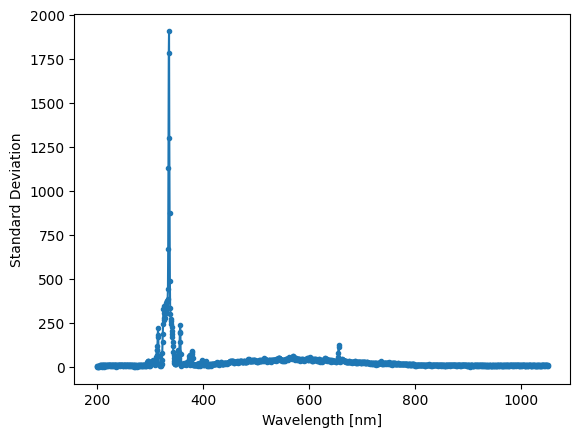

In [22]:
plt.plot([round(float(i),1) for i in std.columns], np.array(std.values.tolist()).flatten(), '.-')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Standard Deviation')
plt.show()

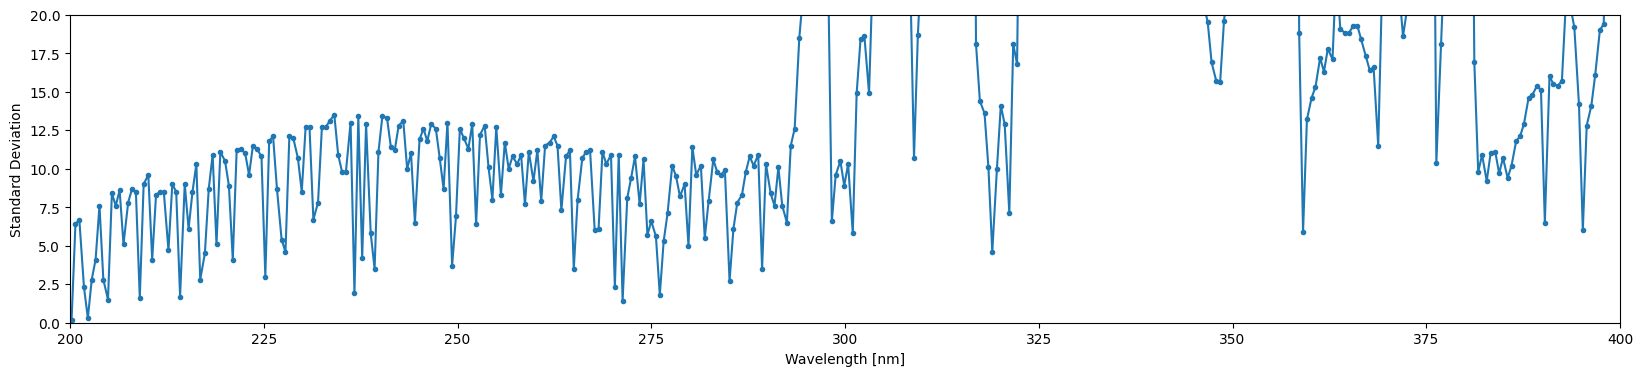

In [35]:
plt.figure(figsize=(20,4))
plt.plot([round(float(i),1) for i in std.columns], np.array(std.values.tolist()).flatten(), '.-')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Standard Deviation')
plt.xlim(200,400)
plt.ylim(0,20)
plt.show()

In [ ]:
df_log = df.copy()

# log
for i in range(len(df_log.index)):
    for j in range(len(df_log.columns)):
        if df_log.iloc[i,j]<=1:
            df_log.iloc[i,j]=0
        else:
            df_log.iloc[i,j] = np.log10(df_log.iloc[i,j])

In [ ]:
std_log = df_log.agg(['std']).round(1)

plt.plot([round(float(i),1) for i in std_log.columns], np.array(std_log.values.tolist()).flatten(), '.-')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Standard Deviation')
plt.show()

In [26]:
# random color generator
import random
random.seed(33)
colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(10)]

In [27]:
# dynamic plot
# make them interactive
import plotly.graph_objects as go

x = [round(float(i),1) for i in std.columns]
y = np.array(std.values.tolist()).flatten()
clicked = []

fig = go.FigureWidget([go.Scatter(x=x, y=y, mode='lines+markers')])
fig.update_layout(plot_bgcolor="white", xaxis_range=[200,1050], yaxis_range=[0,2000], xaxis_title='Wavelegnth [nm]', yaxis_title='Standard Deviation',
                 title='Process #3; Standard Deviation')
fig.update_xaxes(mirror=True, gridcolor='lightgrey', showgrid=True, linecolor='lightgray', showline=True)
fig.update_yaxes(mirror=True, gridcolor='lightgrey', showgrid=True, linecolor='lightgray', showline=True)
scatter = fig.data[0]
cust_color = colors[2]
scatter.line.color = cust_color
scatter.marker.color = [cust_color] * len(x)
scatter.marker.size = [4] * len(x)
scatter.marker.line.color = [cust_color] * len(x)
scatter.marker.line.width = [1] * len(x)
fig.layout.hovermode = 'closest'


# create our callback functions
def update_point(trace, points, selector):
    c = list(scatter.marker.color)
    s = list(scatter.marker.size)
    for i in points.point_inds:
        c[i] = colors[5]
        s[i] = 10
        with fig.batch_update():
            scatter.marker.color = c
            scatter.marker.size = s
def store_value(trace, points, selector):
    global clicked
    clicked.append([points.__dict__['_xs'][0], points.__dict__['_ys'][0]])
    # df_peak.loc[len(df_peak)] = [points.__dict__['_xs'][0], points.__dict__['_ys'][1]]
def display_value(trace, points, selector):
    for point in points.point_inds:
        x_value = trace.x[point]
        y_value = trace.y[point]
        fig.add_annotation(x=x_value, y=y_value,
            text=f"<b>{x_value}</b>", ax=0, ay=-25, font=dict(size=10))

def wrapper(trace, points, selector):
    update_point(trace, points, selector)
    store_value(trace, points, selector)
    display_value(trace, points, selector)
    
scatter.on_click(wrapper)
# scatter.on_click(store_value)

fig

FigureWidget({
    'data': [{'line': {'color': '#9F1D8A'},
              'marker': {'color': [#9F1D8A, #9F1D8A, #9F1D8A, ..., #9F1D8A,
                                   #9F1D8A, #9F1D8A],
                         'line': {'color': [#9F1D8A, #9F1D8A, #9F1D8A, ...,
                                            #9F1D8A, #9F1D8A, #9F1D8A],
                                  'width': [1, 1, 1, ..., 1, 1, 1]},
                         'size': [4, 4, 4, ..., 4, 4, 4]},
              'mode': 'lines+markers',
              'type': 'scatter',
              'uid': '75246195-834e-4a05-b867-d4984819fafb',
              'x': [200.2, 200.7, 201.2, ..., 1049.0, 1049.6, 1050.2],
              'y': array([0.2, 6.4, 6.7, ..., 8.5, 8.3, 8. ])}],
    'layout': {'hovermode': 'closest',
               'plot_bgcolor': 'white',
               'template': '...',
               'title': {'text': 'Process #3; Standard Deviation'},
               'xaxis': {'gridcolor': 'lightgrey',
                         'linecolo

In [ ]:
# dynamic plot
# make them interactive
x = [round(float(i),1) for i in std_log.columns]
y = np.array(std_log.values.tolist()).flatten()
clicked = []

fig = go.FigureWidget([go.Scatter(x=x, y=y, mode='lines+markers')])
fig.update_layout(plot_bgcolor="white", xaxis_range=[200,1050], yaxis_range=[0,2000], xaxis_title='Wavelegnth [nm]', yaxis_title='Standard Deviation',
                 title='Process #3; Standard Deviation')
fig.update_xaxes(mirror=True, gridcolor='lightgrey', showgrid=True, linecolor='lightgray', showline=True)
fig.update_yaxes(mirror=True, gridcolor='lightgrey', showgrid=True, linecolor='lightgray', showline=True)
scatter = fig.data[0]
cust_color = colors[2]
scatter.line.color = cust_color
scatter.marker.color = [cust_color] * len(x)
scatter.marker.size = [4] * len(x)
scatter.marker.line.color = [cust_color] * len(x)
scatter.marker.line.width = [1] * len(x)
fig.layout.hovermode = 'closest'


# create our callback functions
def update_point(trace, points, selector):
    c = list(scatter.marker.color)
    s = list(scatter.marker.size)
    for i in points.point_inds:
        c[i] = colors[5]
        s[i] = 10
        with fig.batch_update():
            scatter.marker.color = c
            scatter.marker.size = s
def store_value(trace, points, selector):
    global clicked
    clicked.append([points.__dict__['_xs'][0], points.__dict__['_ys'][0]])
    # df_peak.loc[len(df_peak)] = [points.__dict__['_xs'][0], points.__dict__['_ys'][1]]
def display_value(trace, points, selector):
    for point in points.point_inds:
        x_value = trace.x[point]
        y_value = trace.y[point]
        fig.add_annotation(x=x_value, y=y_value,
            text=f"<b>{x_value}</b>", ax=0, ay=-25, font=dict(size=10))

def wrapper(trace, points, selector):
    update_point(trace, points, selector)
    store_value(trace, points, selector)
    display_value(trace, points, selector)
    
scatter.on_click(wrapper)
# scatter.on_click(store_value)

fig